In [16]:
#preprocessing SANBS data

import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("../1_data/private/SANBSdata.csv", error_bad_lines=False)


C:\Users\hjagirdar\AppData\Local\Temp\ipykernel_14724\4011481925.py:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("../1_data/private/SANBSdata.csv", error_bad_lines=False)
C:\Users\hjagirdar\AppData\Local\Temp\ipykernel_14724\4011481925.py:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../1_data/private/SANBSdata.csv", error_bad_lines=False)


In [17]:

print(len(df.loc[df['Outcome'] =='DEFERRAL']))  # number of deferrals
print(len(df))#total observations


df.head()

556068
5115926


,DonorID,Visit_Date,Visit_yr,Visit_Mo,donation_time,don_Sequence,col_Int,Visit_Age,sex,Fixed,...,race_group,race,Ferritin,category,DefCode,Def_start,Def_end,Deferral_permanent,EffectiveYr,EffectiveMo
0,1887945,2017-10-23 00:00:00.000,2017.0,10.0,1345.0,2.0,3622.0,26.0,F,Mobile Clinic,...,4,African Black,0.0,NaN,NaN,NaN,NaN,NoDeferral,NaN,NaN
1,1565252,2021-05-31 00:00:00.000,2021.0,5.0,1435.0,40.0,69.0,44.5,M,Mobile Clinic,...,2,Asian,24.9,NaN,NaN,NaN,NaN,NoDeferral,NaN,NaN
2,2299175,2015-03-10 00:00:00.000,2015.0,3.0,1445.0,6.0,140.0,19.6,M,Mobile Clinic,...,1,White,0.0,NaN,NaN,NaN,NaN,NoDeferral,NaN,NaN
3,2820016,2019-03-18 00:00:00.000,2019.0,3.0,1805.0,3.0,748.0,20.3,F,Mobile Clinic,...,1,White,0.0,NaN,NaN,NaN,NaN,NoDeferral,NaN,NaN
4,3450551,2022-09-06 00:00:00.000,2022.0,9.0,1336.0,3.0,951.0,20.5,M,Mobile Clinic,...,4,African Black,83.8,NaN,NaN,NaN,NaN,NoDeferral,NaN,NaN


In [18]:
#add donor history variables (already created and stored in don_hist.csv)
#see cox_params.xls for more information
df['Visit_Date']=pd.to_datetime(df['Visit_Date']).dt.strftime('%Y-%m-%dT%H:%M:%SZ') #covert to ISO -#2019-03-26T00:00:00Z

don_hist=pd.read_csv("../1_data/private/don_hist.csv")
df=pd.merge(df, don_hist[['DonorID', 'Visit_Date','cum_lifetime_donations','unit_rbc_loss','time_to_fu',
                          'rbc_loss_last_12_months', 'rbc_loss_last_24_months','days_since_last_rbc_loss', 
                          'days_since_last_drbc_loss']], how='left', on=["DonorID", "Visit_Date"])

df.head()

C:\Users\hjagirdar\AppData\Local\Temp\ipykernel_14724\4182776018.py:5: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  don_hist=pd.read_csv("../1_data/private/don_hist.csv")


,DonorID,Visit_Date,Visit_yr,Visit_Mo,donation_time,don_Sequence,col_Int,Visit_Age,sex,Fixed,...,Deferral_permanent,EffectiveYr,EffectiveMo,cum_lifetime_donations,unit_rbc_loss,time_to_fu,rbc_loss_last_12_months,rbc_loss_last_24_months,days_since_last_rbc_loss,days_since_last_drbc_loss
0,1887945,2017-10-23T00:00:00Z,2017.0,10.0,1345.0,2.0,3622.0,26.0,F,Mobile Clinic,...,NoDeferral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1565252,2021-05-31T00:00:00Z,2021.0,5.0,1435.0,40.0,69.0,44.5,M,Mobile Clinic,...,NoDeferral,NaN,NaN,40.0,1.0,119.0,2.0,3.0,69.0,3650.0
2,2299175,2015-03-10T00:00:00Z,2015.0,3.0,1445.0,6.0,140.0,19.6,M,Mobile Clinic,...,NoDeferral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2820016,2019-03-18T00:00:00Z,2019.0,3.0,1805.0,3.0,748.0,20.3,F,Mobile Clinic,...,NoDeferral,NaN,NaN,3.0,1.0,267.0,1.0,1.0,748.0,3650.0
4,3450551,2022-09-06T00:00:00Z,2022.0,9.0,1336.0,3.0,951.0,20.5,M,Mobile Clinic,...,NoDeferral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:

#add a column OUTCOME_TYPE that indicates hgb deferal, other deferral or completed donation to indicate deferral type

df.loc[(df['Outcome'] == 'DEFERRAL') & (df["category"]=='Haematocrit/Haemoglobin'), 'OUTCOME_TYPE'] = 'low hgb'
df.loc[(df['Outcome'] == "SUCCESSFUL DONATION"), 'OUTCOME_TYPE'] = 'completed'
df.loc[(df['Outcome'] == "DEFERRAL") & (df["category"]!='Haematocrit/Haemoglobin') , 'OUTCOME_TYPE'] = 'other deferral'
df['OUTCOME_TYPE'].fillna("no draw", inplace=True)

df.drop(df[df['Visit_Date'].isna()].index, inplace=True) #remove any missing visit dates

df["Visit_Date"] = df["Visit_Date"].astype("datetime64") #convert to date time object

df.sort_values(by=['DonorID', 'don_Sequence', 'Visit_Date'], axis = 0, inplace=True)

df['OUTCOME_TYPE'].value_counts()

completed         4451108
other deferral     308593
low hgb            247475
no draw            108748
Name: OUTCOME_TYPE, dtype: int64

In [20]:

#add censored column (indicates whether row is right censored) 0-censored, 1-notcensored
df['CENSORED']=np.where(df['DonorID'] == df['DonorID'].shift(-1), 1, 0)

#add time_to_return column (time between visits)
#if return exists -> difference between visit dates
#else difference between visit date and end of data collection 2022-12-31

df['time_to_return']= np.where(df['CENSORED']==1, (df['Visit_Date'].shift(-1)-df['Visit_Date'])/np.timedelta64(1, 'D'), (dt.datetime(2022, 12, 31)-df["Visit_Date"])/np.timedelta64(1, 'D'))
#df['time_to_return'].fillna((df['VISIT_DATE'].shift(-1)-df["VISIT_DATE"])/np.timedelta64(1, 'D'), inplace=True)



0.040487000400796336
0.055735750845320564
2435152
2671176


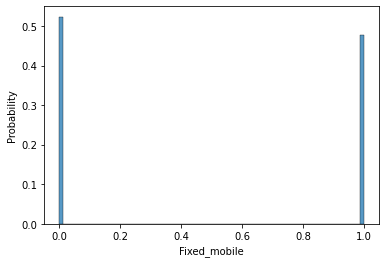

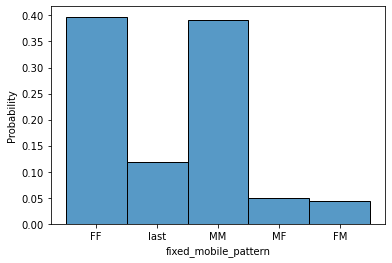

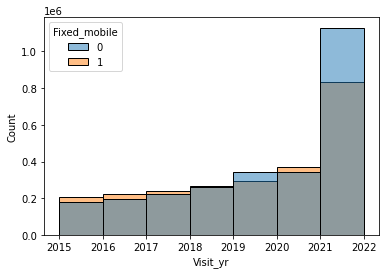

In [21]:
#Fixed-Mobile Donations Analysis

#plot number - mobile=0, fixed=1
fixed=df["Fixed"]
#sns.histplot(df, x="Fixed", stat="probability")
#sns.countplot(fixed)
#print(fixed.value_counts())

# group and remove some categories that are not fixed or mobile
# administrative site and apheresis clinic fall under fixed
# exclude others

df.drop(df[(df['Fixed']== 'Lapsed Clinic') | (df['Fixed']=='Processing Lab')| (df['Fixed']=='Unallocated') 
           | (df["Fixed"]== 'Laboratorium') |(df["Fixed"]=='Doctor')].index, inplace=True)

df['Fixed_mobile'] = np.where(df['Fixed'] == 'Mobile Clinic', 0, 1) #mobile is 0, fixed is 1
sns.histplot(df, x="Fixed_mobile", stat="probability")

#create a column to indicate 
    #1. mobile then mobile - mm
    #2. mobile then fixed -mf
    #3. fixed then fixed - ff
    #4. fixed then mobile - fm

df["FIXED_NEXT"] = np.where(df['DonorID'] == df['DonorID'].shift(-1), df['Fixed_mobile'].shift(-1), 10)
df.loc[((df['FIXED_NEXT']== 1) & (df['Fixed_mobile']== 1)), 'fixed_mobile_pattern'] = 'FF'

df.loc[((df['FIXED_NEXT']==0) & (df['Fixed_mobile']== 0)), 'fixed_mobile_pattern']= 'MM'

df.loc[((df['FIXED_NEXT']==0) & (df['Fixed_mobile']== 1)), 'fixed_mobile_pattern'] = 'FM'

df.loc[((df['FIXED_NEXT']==1) & (df['Fixed_mobile']== 0)), 'fixed_mobile_pattern']= 'MF'
df['fixed_mobile_pattern'].fillna('last', inplace=True)


#Plot fixed pattern
#create value count
plt.figure()
sns.histplot(df, x="fixed_mobile_pattern", stat="probability")
#sns.countplot(fixed_mobile)



# percent population fixed vs mobile by year
# - do people go back to the same mobile site?
# - how many people never completed donation?

plt.figure()
sns.histplot(data=df, x="Visit_yr", hue="Fixed_mobile", binwidth=1)

# the % of each resulting in hemoglobin deferral or other deferral

print(len(df.loc[((df['OUTCOME_TYPE']=="low hgb") & (df['Fixed_mobile']== 1))])/len(df.loc[(df['Fixed_mobile']==1)]))
print(len(df.loc[((df['OUTCOME_TYPE']=="low hgb") & (df['Fixed_mobile']== 0))])/len(df.loc[(df['Fixed_mobile']==0)]))

print(len(df.loc[(df['Fixed_mobile']==1)]))
print(len(df.loc[(df['Fixed_mobile']==0)]))



In [22]:
# Compute donation product for deferred donors - using the following criteria
 # 1) if donor only has WB then deferred donation is WB
 # 2) if next donation procedure is WB then deferred donation is WB/
 # 3) if previous donation procedure is WB then deferred donation is WB/
 # 4) if only donated one time and got deferred - WB
 
#prev successful 
#next successful

#df["don_proc_next"] = df.groupby("DonorID")["donation_product"].transform("shift")


df_don_proc=df.groupby("DonorID")["donation_product"].apply(list)
df["index"]=df.groupby("DonorID").cumcount()
df=pd.merge(df, df_don_proc, on="DonorID")

#missing=df.query("don_proc_imputed == 'DEF PROD'")
#len(missing)

#print(df['donation_product_x'].value_counts())


In [23]:

#keep only wb and drbc or rbc
wb=['WB', "DEF PROD", 'WBSB', 'WBMED', 'RBCAPH']
df= df.loc[(df['donation_product_x'] == 'WB') | (df['donation_product_x']== 'RBCAPH')|(df['donation_product_x'] == 'DEF PROD')
           |(df['donation_product_x'] == 'WBSB')| (df['donation_product_x'] == 'WBMED')| (df['donation_product_x'] == 'WBDISC')
           |( df['donation_product_x'] == 'WBOB') |(df['donation_product_x'] == 'WBDP') | (df['donation_product_x'] == 'WBD')]
df['donation_product_x'].value_counts()

WB          4341745
DEF PROD     546522
WBSB          75317
WBMED         12342
RBCAPH         7533
WBDISC         1085
WBOB            389
WBDP            381
WBD             204
Name: donation_product_x, dtype: int64

In [24]:
#change all above to just WB
df.loc[(df['donation_product_x'] == 'WB')|
           (df['donation_product_x'] == 'WBSB')| (df['donation_product_x'] == 'WBMED')| (df['donation_product_x'] == 'WBDISC')
           |( df['donation_product_x'] == 'WBOB') |(df['donation_product_x'] == 'WBDP') | (df['donation_product_x'] == 'WBD'),
           'donation_product_x']='WB'

In [25]:
#add time from elibilty until mobile drives repeat 
# ADD NUMBER OF MOBILE DRIVES REPEATS IN 1 YEAR PERIOD STARTING FROM TIME OF ELIGIBILITY

In [26]:
#remove outcomes with def_end < visit_date
df.drop(df[df['Visit_Date'] > df['Def_end']].index, inplace=True)

# add variable first time -> 1- first time, 0-repeat

df['first_time'] = np.where(df['index'] == 0, 1, 0)

In [27]:
#remove permanent deferrals
df.drop(df[df.Deferral_permanent == 'Perm'].index, inplace=True)
df.drop(df[(df['OUTCOME_TYPE'] == 'other deferral') & (df['Deferral_permanent'] == 'NoDeferral')].index, inplace=True)


In [28]:
#compute time_to_return with shifts for completed donation: subtract 56 days 

df['time_to_return'] = np.where(df['OUTCOME_TYPE'] == 'completed', (df['time_to_return'] - 56), df['time_to_return'])

#compute time_to_return with shifts for other donations
#first covert eligibilty year and month to a datetime object

df["Def_end"] = df["Def_end"].astype("datetime64")
#df['Def_end'].isna().sum()

#hgb deferrals
df['time_to_return'] = np.where(df['OUTCOME_TYPE'] == 'low hgb', (df['time_to_return'] - ((df['Def_end'] - df['Visit_Date'])/np.timedelta64(1, 'D'))), df['time_to_return'])

#other deferrals
df['time_to_return'] = np.where(df['OUTCOME_TYPE'] == 'other deferral', (df['time_to_return'] - ((df['Def_end'] - df['Visit_Date'])/np.timedelta64(1, 'D'))), df['time_to_return'])
df['time_to_return'].isna().sum()

#df.loc['OUTCOME_TYPE','time_to_return', 'Def_end'].head(25)

0

In [29]:
# documenting some errors in data

df['time_to_return'].isnull().sum()

#df_end=df.loc[df['Visit_Date'] > df['Def_end']]
#print(len(df_end))
#df_end.head(25).to_csv('../4_output/def_end_error.csv')

#df_def=df.loc[(df['Deferral_permanent'] == 'NoDeferral') & (df['OUTCOME_TYPE'] == "other deferral")]
#df_def.head(25).to_csv('../4_output/def_permanent_error.csv')

#df_neg=df.loc[ (df['time_to_return']<0)]
#print(len(df_neg))
#df_neg.head(-25)



0

In [30]:
df.to_csv(("../1_data/private/preprocessed_data.csv"), index=False)
